In [1]:
import numpy as np
from gcs import GCSforBlocks
from pydrake.geometry.optimization import Point

In [2]:
gcs = GCSforBlocks()
initial_state = Point(np.array([0, 2, 4]))
final_state = Point(np.array([0, 5, 7]))
gcs.build_the_graph(initial_state, 0, final_state, 0)

Adding layers: 100%|█████████████████████████████| 5/5 [00:00<00:00, 152.00it/s]


Solving...
Optimal cost is 16.0


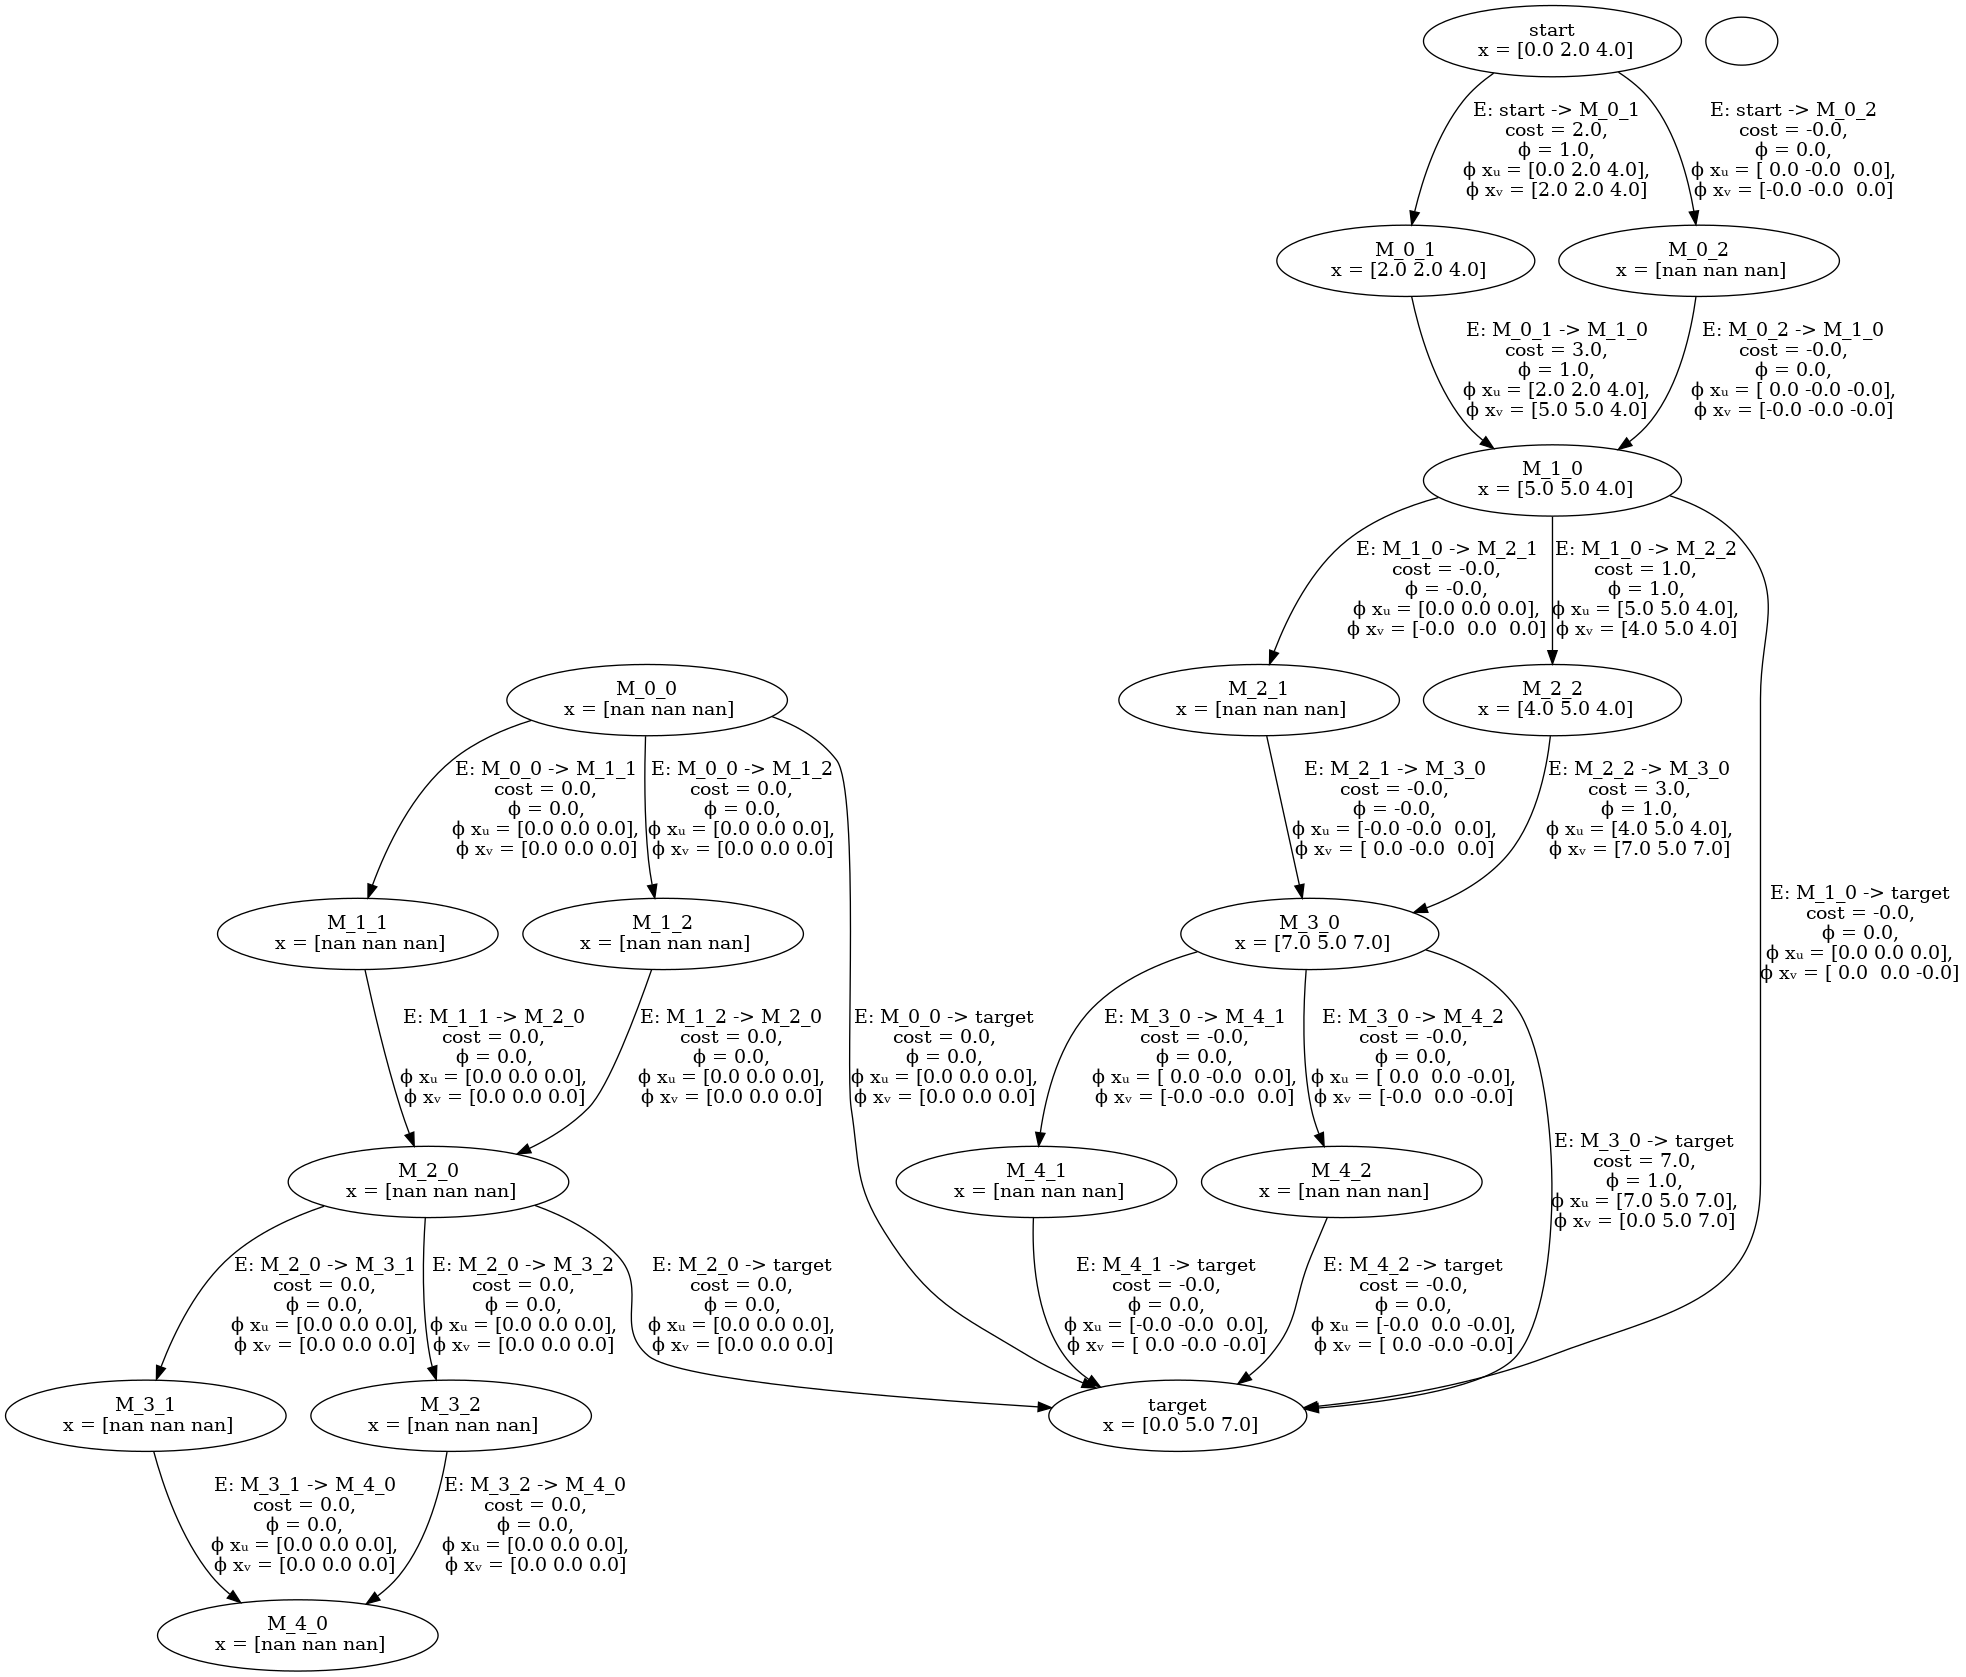

In [3]:
gcs.solve(True, 30)

In [4]:
gcs.solution.get_optimal_cost()

16.0

In [10]:
gcs.solution.get_solver_id().name()

'Mosek'

In [6]:
gcs.solution.get_x_val()

array([ 8.22602361e-01,  2.27264336e-09,  1.53638406e+00,  3.60049910e+00,
        2.42117616e-09,  1.53638406e+00,  3.60049910e+00,  1.90015981e-09,
        1.99275045e-08,  3.97558317e-08,  3.97676307e-08,  7.95685907e-08,
        1.74168615e-07,  1.74133649e-07,  7.95908090e-08,  1.35399691e-07,
        8.15688051e-09,  3.29863746e-08,  1.63998903e-08,  3.28562713e-08,
        6.34797207e-08,  1.63524720e-08,  6.35299787e-08,  3.04670506e-08,
        6.89257064e-02,  5.46793444e-09,  6.64391669e-09,  3.99500782e-01,
        6.58720203e-09,  6.61270666e-09,  3.99500782e-01,  2.33383599e-09,
        1.08471905e-01,  5.34433622e-09,  4.63615877e-01,  6.71769718e-09,
        6.60609648e-09,  4.63615877e-01,  6.65984884e-09,  2.30061717e-09,
        5.80059670e-01,  3.86840589e-08,  9.49582491e-01,  2.79233752e+00,
        2.59972042e-08,  9.49582491e-01,  2.79233752e+00,  1.34471233e-08,
        6.89257063e-02,  6.61509693e-09,  6.61881180e-09,  3.99500782e-01,
        6.79557002e-01,  

In [ ]:
M0.PointInSet(p.x())

In [ ]:
mat = np.zeros((3, 3))
mat[:, 0] = np.ones(3)
mat